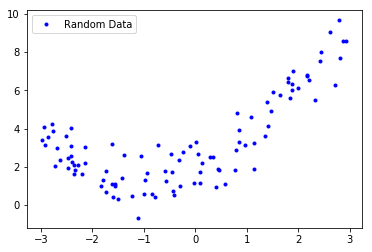

In [20]:
# (p. 121) Polynomial regression
# Generate non-linear test data:
import numpy as np

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(X, y, "b.", label="Random Data")
plt.legend(loc="upper left")
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.29717467]), array([-0.29717467,  0.08831278]))

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.88051327]), array([[ 1.02726513,  0.52223419]]))

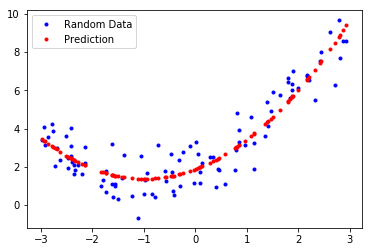

In [23]:
y_pred = X_poly.dot(lin_reg.coef_.T) + lin_reg.intercept_
plt.plot(X, y, "b.", label="Random Data")
plt.plot(X, y_pred, "r.", label="Prediction")
plt.legend(loc="upper left")
plt.show()

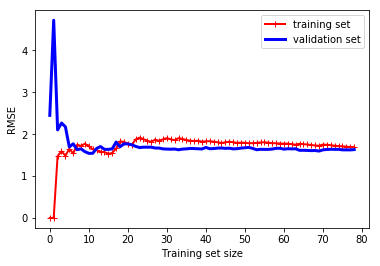

In [24]:
# (p. 124) learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y, ylim=None):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.ylim(ylim)
    plt.legend(loc="upper right")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

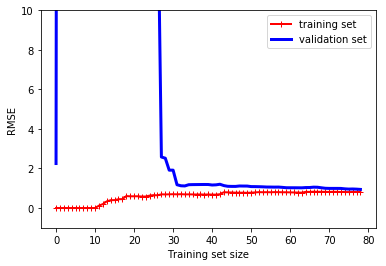

In [25]:
# (p. 125) 10th-degree polynomial
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y, [-1, 10])

In [26]:
# (p. 129) Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 4.81008277]])

In [27]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 3.72637043])

In [28]:
# (p. 132) Lasso Regression
from sklearn.linear_model import Lasso

# Alternative: use SGDRegressor with penalty="l1"
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 4.75788882])

In [29]:
# (p. 132) Elastic Net
from sklearn.linear_model import ElasticNet

# l1_ratio = mix ratio, 0 ^= Ridge, 1 ^= Lasso, 0.5 ^= half/half
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 4.76208269])

In [30]:
# (p. 133f.) Early stopping
#from sklearn.base import clone
#
#sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
#minimum_val_error = float("inf")
#best_epoch = None
#best_model = None
#for epoch in range(1000):
#    sgd_reg.fit(X_train_poly_scaled...) # X_train_poly_scaled undefined in book :(
    # ...
#

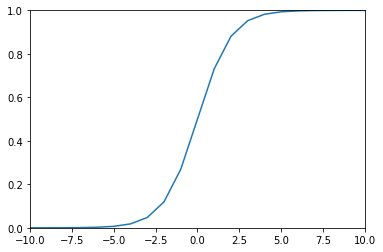

In [39]:
# (p. 135) Logistic regression
import math

x = np.array(range(-10, 11))
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)
plt.xlim([-10, 10])
plt.ylim([0, 1])
plt.show()

In [41]:
# (p. 137) Iris dataset for classifier
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['target', 'feature_names', 'data', 'DESCR', 'target_names']

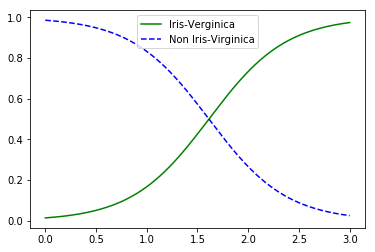

In [45]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, 0 otherwise

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1 , 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Verginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Non Iris-Virginica")
plt.legend(loc="upper center")
plt.show()